In [1]:
!pip install qiskit
!pip install qiskit-machine-learning
!pip install qiskit[visualization]
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 53.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 36.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.1/231.1 kB 4.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e9f83571266774dc5f9f8c3837cb531e8e8fcc652a2d92887ef2e62e6477a671
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.5 MB/s eta 0:

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-dnai1/I1.txt


In [3]:
import pandas as pd


file_path = '/kaggle/input/data-dnai1/I1.txt'  


df = pd.read_csv(file_path, delimiter=',', names=['sgRNA_sequence', 'target_DNA_sequence', 'off_target_activity'])


df.head()


,sgRNA_sequence,target_DNA_sequence,off_target_activity
0,G_AGTCCGAGCAGAAGAAGAAAGG,GGAGTCCGTGCAGAAGCAGGAAGC,0.0
1,G_AGTCCGAGCAGAAGAAGAAAGG,CAAGTCCGAGAAGAAGCAGAAAAG,0.0
2,G_AGTCCGAGCAGAAGAAGAAAGG,GAAGTCTTAGCAAAAGAAGAAAGC,0.0
3,G_AGTCCGAGCAGAAGAAGAAAGG,GAAGTCCGAGGAGAGGAAGAAAGG,0.0
4,G_AGTCCGAGCAGAAGAAGAAAGG,GAAGGCGGAGAAGAAGAAGAAATT,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584949 entries, 0 to 584948
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sgRNA_sequence       584949 non-null  object 
 1   target_DNA_sequence  584949 non-null  object 
 2   off_target_activity  584949 non-null  float64
dtypes: float64(1), object(2)
memory usage: 13.4+ MB


In [5]:
df.isnull().sum()

sgRNA_sequence         0
target_DNA_sequence    0
off_target_activity    0
dtype: int64

In [6]:
df['off_target_activity'].describe()

count    584949.000000
mean          0.012601
std           0.111545
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: off_target_activity, dtype: float64

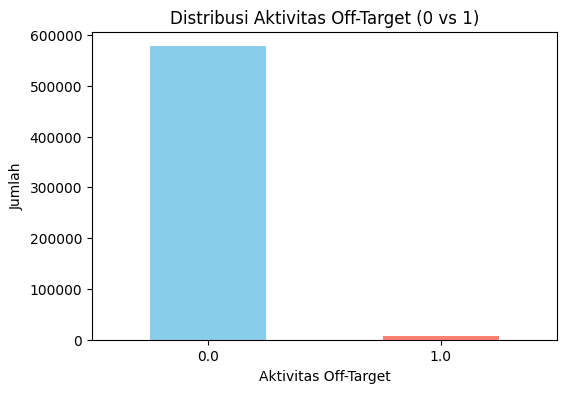

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
df['off_target_activity'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Aktivitas Off-Target (0 vs 1)')
plt.xlabel('Aktivitas Off-Target')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()


In [8]:
df['off_target_activity'].value_counts()

off_target_activity
0.0    577578
1.0      7371
Name: count, dtype: int64

In [9]:
# Separate the data into two groups based on 'off_target_activity'
df_0 = df[df["off_target_activity"] == 0]
df_1 = df[df["off_target_activity"] == 1]

# Randomly sample 7371 entries from group 0 to match the size of group 1
sampled_df_0 = df_0.sample(n=7371, random_state=42)

# Combine the two groups into a balanced dataset
balanced_df = pd.concat([sampled_df_0, df_1], axis=0).sample(frac=1, random_state=42)
balanced_df_Q = pd.concat([sampled_df_0, df_1], axis=0).sample(frac=1, random_state=42)

# Display the size of the balanced dataset and label counts
balanced_df_info = {
    "Total Entries": len(balanced_df),
    "Label Counts": balanced_df["off_target_activity"].value_counts()
}

# Optional: print the balanced dataset info
print(balanced_df_info)

{'Total Entries': 14742, 'Label Counts': off_target_activity
1.0    7371
0.0    7371
Name: count, dtype: int64}


In [10]:
balanced_df.head()

,sgRNA_sequence,target_DNA_sequence,off_target_activity
579719,-GAACACAAAGCATAGACTGCAGG,-GAATTTAAAGCATAGACTGCAAG,1.0
578221,-GGCACTGCGGCTGGAGGTGGTGG,-GTTACTGTGGCTGGAAGTGGTGG,1.0
578803,-GGCACTGCGGCTGGAGGTGGGGG,-AAGACTGTGGCGGGGGGTGGGGG,1.0
51351,-GGCCCAGACTGAGCACGTGAGGG,-GGCCAAGACTGA_CACCTGGGGG,0.0
581417,-GACCCCCTCCACCCCGCCTCAGG,-CACCCACCCCACCCGGCCTCAGG,1.0


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Menggunakan TfidfVectorizer untuk mengubah 'sgRNA_sequence' menjadi fitur numerik
vectorizer_sgRNA = TfidfVectorizer(analyzer='char', ngram_range=(1, 2))  # Menggunakan karakter dan bigram
X_sgRNA = vectorizer_sgRNA.fit_transform(balanced_df['sgRNA_sequence'])

# Menggunakan TfidfVectorizer untuk mengubah 'target_DNA_sequence' menjadi fitur numerik
vectorizer_target = TfidfVectorizer(analyzer='char', ngram_range=(1, 2))  # Menggunakan karakter dan bigram
X_target = vectorizer_target.fit_transform(balanced_df['target_DNA_sequence'])

# Menggabungkan fitur dari kedua sekuens DNA
from scipy.sparse import hstack
X = hstack([X_sgRNA, X_target])

# Target variabel
y = balanced_df['off_target_activity']

# Membagi data menjadi set pelatihan dan pengujian (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Memprediksi hasil di data uji
y_pred = model.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76      1456
         1.0       0.76      0.80      0.78      1493

    accuracy                           0.77      2949
   macro avg       0.77      0.77      0.77      2949
weighted avg       0.77      0.77      0.77      2949



In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [13]:
# Membuat dan melatih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Memprediksi hasil di data uji
y_pred = model.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      1456
         1.0       0.82      0.84      0.83      1493

    accuracy                           0.83      2949
   macro avg       0.83      0.83      0.83      2949
weighted avg       0.83      0.83      0.83      2949



In [14]:
balanced_df_Q.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14742 entries, 579719 to 474741
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sgRNA_sequence       14742 non-null  object 
 1   target_DNA_sequence  14742 non-null  object 
 2   off_target_activity  14742 non-null  float64
dtypes: float64(1), object(2)
memory usage: 460.7+ KB


In [15]:
balanced_df_Q['off_target_activity'].value_counts()

off_target_activity
1.0    7371
0.0    7371
Name: count, dtype: int64

In [16]:
balanced_df_Q.head(20)

,sgRNA_sequence,target_DNA_sequence,off_target_activity
579719,-GAACACAAAGCATAGACTGCAGG,-GAATTTAAAGCATAGACTGCAAG,1.0
578221,-GGCACTGCGGCTGGAGGTGGTGG,-GTTACTGTGGCTGGAAGTGGTGG,1.0
578803,-GGCACTGCGGCTGGAGGTGGGGG,-AAGACTGTGGCGGGGGGTGGGGG,1.0
51351,-GGCCCAGACTGAGCACGTGAGGG,-GGCCAAGACTGA_CACCTGGGGG,0.0
581417,-GACCCCCTCCACCCCGCCTCAGG,-CACCCACCCCACCCGGCCTCAGG,1.0
124398,-GAGTCCGAGCAGAAGAAGAAGGG,-GAGTTC_AGAAGAAGAAAAAGGG,0.0
578440,-GGCACTGCGGCTGGAGGTGGAGG,-GGCGCTGTGGCGGGAGGCGGAGG,1.0
583990,-GGGTGGGGGGAGTTTGCTCCAGG,-AAAGGGGGGAACTTTGCTCCAGG,1.0
577872,-GGCACTGCGGCTGGAGGTGGAGG,-GGCAATGCAGCTGGAACTGGAGG,1.0
374392,-GGGAAAGACCCAGCATCCGTCGG,-GCGAAAGAGCCAGACTCCGTCTT,0.0


In [17]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Fungsi untuk ekstrak k-mer dari sekuens DNA
def extract_kmers(sequence, k=3):
    kmers = [sequence[i:i+k] for i in range(len(sequence)-k+1)]
    return kmers

# Menggunakan LabelEncoder untuk mengubah k-mer menjadi angka
def encode_kmers(kmers):
    le = LabelEncoder()
    le.fit(kmers)
    return le.transform(kmers)

def preprocess_sequences(df, k=3):
    # List untuk menyimpan k-mer
    sgRNA_kmers = []
    target_kmers = []
    
    for i in range(len(df)):
        # Ekstrak k-mer untuk setiap sekuens
        sgRNA_kmers_seq = extract_kmers(df['sgRNA_sequence'].iloc[i], k)
        target_kmers_seq = extract_kmers(df['target_DNA_sequence'].iloc[i], k)
        
        # Ambil nilai k-mer pertama (sesuaikan dengan panjang data)
        if len(sgRNA_kmers_seq) > 0 and len(target_kmers_seq) > 0:
            sgRNA_kmers.append(sgRNA_kmers_seq[0])  # Ambil k-mer pertama dari sgRNA
            target_kmers.append(target_kmers_seq[0])  # Ambil k-mer pertama dari target

    # Mengencode k-mer menjadi angka
    sgRNA_kmers_encoded = encode_kmers(sgRNA_kmers)
    target_kmers_encoded = encode_kmers(target_kmers)
    
    # Gabungkan fitur sgRNA dan target menjadi array
    return np.column_stack((sgRNA_kmers_encoded, target_kmers_encoded))

# Menyusun fitur dan label
X_features = preprocess_sequences(balanced_df_Q)
y_labels = balanced_df_Q['off_target_activity'].values


In [18]:
print(f'X_features shape: {X_features.shape}')
print(f'y_labels shape: {y_labels.shape}')

X_features shape: (14742, 2)
y_labels shape: (14742,)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_labels, test_size=0.2, random_state=1)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {y_train.shape}')
print(f'Y_test shape: {y_test.shape}')


X_train shape: (11793, 2)
X_test shape: (2949, 2)
Y_train shape: (11793,)
Y_test shape: (2949,)


In [20]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

def amplitude_encoding(features, num_qubits):
    """
    Encodes the features into quantum amplitude states.
    
    Args:
      features: Feature vector (1D array).
      num_qubits: Number of qubits to use in the quantum circuit.
    
    Returns:
      QuantumCircuit: Quantum circuit encoding the feature vector.
    """
    # Normalize the features
    norm = np.linalg.norm(features)
    normalized_features = features / norm

    # Initialize quantum circuit
    qc = QuantumCircuit(num_qubits)
    qc.initialize(normalized_features, range(num_qubits))
    return qc


def encode_data(X, num_qubits):
    """
    Encodes the entire dataset into quantum statevectors.
    """
    simulator = AerSimulator()
    encoded_data = []
    desired_length = 2 ** num_qubits

    for i in range(len(X)):
        features = X[i]  # Using numpy array indexing

        # Add padding if features length is less than 2^n
        if len(features) < desired_length:
            padded_features = np.pad(features, (0, desired_length - len(features)))
        else:
            padded_features = features[:desired_length]

        # Encode the features
        qc = amplitude_encoding(padded_features, num_qubits)
        qc.save_statevector()

        # Run the simulation
        result = simulator.run(qc).result()
        statevector = result.get_statevector()

        encoded_data.append(statevector)

    return encoded_data


In [21]:
# Menentukan jumlah qubit yang diperlukan (misalnya, jika memiliki 2 fitur numerik)
num_qubits = 1  # Atur jumlah qubit sesuai dengan jumlah fitur numerik

# Encode data pelatihan dan pengujian
x_train_encoded = encode_data(X_train, num_qubits)
x_test_encoded = encode_data(X_test, num_qubits)


In [22]:
# Pastikan data encoded dalam bentuk array dengan tipe float
x_train_encoded = np.array(x_train_encoded, dtype=float)
x_test_encoded = np.array(x_test_encoded, dtype=float)

# Pastikan label dalam bentuk array 1D
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

# Pastikan bentuknya sesuai (setiap sampel memiliki 2 fitur)
print(f"x_train_encoded shape: {np.array(x_train_encoded).shape}")
print(f"x_test_encoded shape: {np.array(x_test_encoded).shape}")

x_train_encoded shape: (11793, 2)
x_test_encoded shape: (2949, 2)


/opt/conda/lib/python3.10/site-packages/qiskit/quantum_info/states/statevector.py:110: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.array(self.data, dtype=dtype, copy=copy)


In [23]:
# # Menggunakan hanya 100 data pertama untuk pelatihan dan pengujian
# x_train_encoded_100 = np.array(x_train_encoded[:100], dtype=float)
# y_train_100 = np.array(y_train[:100]).ravel()  # Menggunakan bentuk satu dimensi

# x_test_encoded_100 = np.array(x_test_encoded[:100], dtype=float)
# y_test_100 = np.array(y_test[:100]).ravel()  # Menggunakan bentuk satu dimensi

# # Pastikan bentuknya sesuai (setiap sampel memiliki 2 fitur)
# print(f"x_train_encoded_100 shape: {np.array(x_train_encoded_100).shape}")
# print(f"x_test_encoded_100 shape: {np.array(x_test_encoded_100).shape}")

In [24]:
# Mengambil data dengan target 0 dan 1 untuk pelatihan
x_train_encoded_0 = x_train_encoded[y_train == 0]
x_train_encoded_1 = x_train_encoded[y_train == 1]

y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]

# Pilih 50 data pertama dari masing-masing kelas
x_train_encoded_100 = np.concatenate([x_train_encoded_0[:50], x_train_encoded_1[:50]])
y_train_100 = np.concatenate([y_train_0[:50], y_train_1[:50]])

# Mengambil data dengan target 0 dan 1 untuk pengujian
x_test_encoded_0 = x_test_encoded[y_test == 0]
x_test_encoded_1 = x_test_encoded[y_test == 1]

y_test_0 = y_test[y_test == 0]
y_test_1 = y_test[y_test == 1]

# Pilih 50 data pertama dari masing-masing kelas
x_test_encoded_100= np.concatenate([x_test_encoded_0[:50], x_test_encoded_1[:50]])
y_test_100 = np.concatenate([y_test_0[:50], y_test_1[:50]])

# Verifikasi bentuk data dan distribusi target
print(f"x_train_encoded_100 shape: {x_train_encoded_100.shape}")
print(f"y_train_100 shape: {y_train_100.shape}, distribusi: {np.unique(y_train_100, return_counts=True)}")

print(f"x_test_encoded_100 shape: {x_test_encoded_100.shape}")
print(f"y_test_100 shape: {y_test_100.shape}, distribusi: {np.unique(y_test_100, return_counts=True)}")


x_train_encoded_100 shape: (100, 2)
y_train_100 shape: (100,), distribusi: (array([0., 1.]), array([50, 50]))
x_test_encoded_100 shape: (100, 2)
y_test_100 shape: (100,), distribusi: (array([0., 1.]), array([50, 50]))


In [25]:
!pip install qiskit-algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 5.5 MB/s eta 0:00:00a 0:00:01


In [26]:
# from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
# from qiskit_machine_learning.algorithms import VQC
# from qiskit.primitives import Sampler
# from sklearn.model_selection import ParameterGrid
# from qiskit_algorithms.optimizers import SPSA
# import numpy as np

# # Parameter grid untuk tuning
# param_grid = {
#     'feature_map_reps': [2],
#     'ansatz_reps': [2],
#     'maxiter': [100]
# }

# # Variabel untuk melacak hasil tuning dan nilai loss per parameter
# best_score = 0
# best_params = {}
# tuning_results = []
# loss_values_dict = {}  # Dictionary untuk menyimpan loss per parameter

# # Melakukan grid search untuk kombinasi terbaik
# for params in ParameterGrid(param_grid):
#     feature_map = ZZFeatureMap(feature_dimension=2, reps=params['feature_map_reps'])  # Menggunakan 2 fitur untuk encoding
#     ansatz = RealAmplitudes(num_qubits=2, reps=params['ansatz_reps'])  # Menggunakan 2 qubit untuk data 2 fitur

#     # Sampler dan Optimizer
#     sampler = Sampler()
#     optimizer = SPSA(maxiter=params['maxiter'])

#     # Callback untuk melacak loss
#     loss_per_iteration = []
#     def callback(weights, loss):
#         print(f"Loss: {loss}")
#         loss_per_iteration.append(loss)

#     # Konfigurasi VQC
#     vqc = VQC(
#         num_qubits=2,  # Menggunakan 2 qubit
#         feature_map=feature_map,
#         ansatz=ansatz,
#         optimizer=optimizer,
#         sampler=sampler,
#         callback=callback
#     )

#     # Latih model dengan data yang telah dipilih
#     vqc.fit(x_train_encoded, y_train)

#     # Evaluasi model pada data uji
#     score = vqc.score(x_test_encoded_100, y_test_100)
#     print(f"Params: {params}, Test Accuracy: {score}")

#     # Simpan hasil tuning dan loss
#     tuning_results.append({
#         'feature_map_reps': params['feature_map_reps'],
#         'ansatz_reps': params['ansatz_reps'],
#         'maxiter': params['maxiter'],
#         'test_accuracy': score
#     })
#     loss_values_dict[f"reps_{params['feature_map_reps']}_{params['ansatz_reps']}"] = loss_per_iteration

#     # Simpan model terbaik
#     if score > best_score:
#         best_score = score
#         best_params = params
#         best_model = vqc

# # Output: Akurasi terbaik dan prediksi model terbaik
# print("Best Parameters:", best_params)
# print("Best Test Accuracy:", best_score)
# predictions = best_model.predict(x_test_encoded_100)
# print("Predictions with Best Model:", predictions)


In [27]:
# import pandas as pd

# # Tampilkan hasil tuning dalam bentuk DataFrame
# tuning_results_df = pd.DataFrame(tuning_results)
# print("\nTuning Results:")
# print(tuning_results_df)

# # Output: Prediksi dari model terbaik
# print("Predictions with Best Model:", predictions)


In [ ]:
# Tuning Results:
#    feature_map_reps  ansatz_reps  maxiter  test_accuracy
# 0                 1            1      100       0.580536
# 1                 2            1      100       0.575449
# 2                 1            2      100       0.592743
# 3                 2            2      100       0.572058


In [28]:
# import matplotlib.pyplot as plt

# # Visualisasi Loss untuk setiap kombinasi parameter
# plt.figure(figsize=(10, 6))
# colors = ['red', 'blue', 'green', 'purple']  # Pilihan warna untuk tiap parameter
# for i, (label, losses) in enumerate(loss_values_dict.items()):
#     plt.plot(losses, label=f"{label}: {tuning_results[i]}", color=colors[i])

# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Training Loss Over Iterations for Different Parameters')
# plt.legend(title='Parameters')
# plt.show()


In [29]:
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.utils import algorithm_globals
import numpy as np

# Set seed for reproducibility
algorithm_globals.random_seed = 12345

# Definisikan grid parameter untuk tuning manual
C_values = [10]  # Nilai regulasi SVM hanya 1 dan 10
feature_map_reps = [1]  # Repetisi pada feature map

# Variabel untuk melacak hasil tuning
best_score = 0
best_params = {}
best_model = None
tuning_results = []

# Loop manual untuk mencari parameter terbaik
for C in C_values:
    for reps in feature_map_reps:
        # Buat feature map dengan jumlah reps yang bervariasi
        feature_map = ZZFeatureMap(feature_dimension=2, reps=reps)  # 2 fitur karena menggunakan 2 qubit

        # Buat quantum kernel dengan feature map tersebut
        quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

        # Buat model QSVC dengan quantum kernel dan nilai C
        qsvc = QSVC(quantum_kernel=quantum_kernel, C=C)

        # Latih model pada data pelatihan (menggunakan 1000 data pertama)
        qsvc.fit(x_train_encoded_100, y_train_100)

        # Evaluasi model pada data uji
        score = qsvc.score(x_test_encoded, y_test)
        print(f"Parameters: C={C}, reps={reps} => Test Accuracy: {score}")

        # Simpan hasil tuning
        tuning_results.append({
            'C': C,
            'feature_map_reps': reps,
            'test_accuracy': score
        })

        # Simpan model dan parameter jika akurasi lebih baik
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'feature_map_reps': reps}
            best_model = qsvc

# Output: Best Parameters, Best Test Accuracy, and Predictions
print("Best Parameters:", best_params)
print("Best Test Accuracy:", best_score)

# Prediksi dengan model terbaik
predictions_best = best_model.predict(x_test_encoded_100)
print("Predictions with Best Model:", predictions_best)


Parameters: C=10, reps=1 => Test Accuracy: 0.5666327568667345
Best Parameters: {'C': 10, 'feature_map_reps': 1}
Best Test Accuracy: 0.5666327568667345
Predictions with Best Model: [0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1.]


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.utils import algorithm_globals
import numpy as np
import pandas as pd

# Set seed for reproducibility
algorithm_globals.random_seed = 12345

# Definisikan feature map
num_qubits = 2  # Karena data kita hanya memiliki 2 fitur
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2)

# Buat quantum kernel
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

# Definisikan parameter grid untuk tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Contoh nilai C yang ingin diuji
    'kernel': ['precomputed']  # Kernel yang digunakan
}

# Buat model SVC
svc = SVC()

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2)

# Hitung kernel matrix untuk data pelatihan
kernel_matrix = quantum_kernel.evaluate(x_train_encoded_100)  # Menghitung kernel matrix untuk data pelatihan

# Fit model dengan kernel matrix
grid_search.fit(kernel_matrix, y_train_100)

# Tampilkan parameter terbaik dan akurasi terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Test Accuracy:", grid_search.best_score_)

# Prediksi dengan model terbaik
best_svc = grid_search.best_estimator_
test_kernel_matrix = quantum_kernel.evaluate(x_test_encoded_100)  # Hitung kernel matrix untuk data uji
predictions = best_svc.predict(test_kernel_matrix)
print("Predictions:", predictions)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ..........................C=0.1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ............................C=1, kernel=precomputed; total time=   0.0s
[CV] END ...........................C=10, kernel=precomputed; total time=   0.0s
[CV] END ...........................C=10, kernel=

In [31]:
# Tampilkan hasil tuning dalam bentuk dataframe
results_df = pd.DataFrame(grid_search.cv_results_)
print("\nHyperparameter Tuning Results:")
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])



Hyperparameter Tuning Results:
                                params  mean_test_score  std_test_score  \
0  {'C': 0.1, 'kernel': 'precomputed'}             0.61        0.096954   
1    {'C': 1, 'kernel': 'precomputed'}             0.63        0.081240   
2   {'C': 10, 'kernel': 'precomputed'}             0.61        0.037417   
3  {'C': 100, 'kernel': 'precomputed'}             0.72        0.074833   

   rank_test_score  
0                3  
1                2  
2                3  
3                1  
